# Problem Statement

TapToBuy is an online grocery store which has been facing stiff competition from competitors off-late. One of the major factors why people have started using products from its competitors is their personalized marketing campaigns. Determined to bridge this gap, TapToBuy has decided to do a __Customer Segmentation__ based on the customer dataset to plan personalized marketing campaigns. Lets help the marketing head, segment the customers, using our knowledge of unsupervised models.

# Dataset Overview

The dataset for TapToBuy contains __4,832 rows__ and __9 columns__. The dataset appears to represent customer demographic and behavioral data, likely for a retail or e-commerce context. 

__Here's the data dictionary for the TapToBuy dataset!__

__ID:__ A unique identifier for each record in the dataset. It's an integer and has no missing values.

__Gender:__ Categorical variable representing the gender of the customer. It's a non-null object type, indicating text entries like 'Male', 'Female', etc.

<b>__Ever_Married:__</b> Categorical variable indicating the marital status of the customer. It contains values like 'Yes' and 'No'. There are missing values in this column, which may need imputation or treatment for certain analyses.

__Age:__ Represents the age of the customer. It's a numerical variable and has no missing values. The dataset needs to be checked for any anomalous or unrealistic age values.

__Graduated:__ Categorical variable indicating whether the customer has graduated (likely from higher education). Contains values like 'Yes' and 'No'. Some missing values are present.

__Profession:__ Represents the profession of the customer. It's a categorical variable with various text entries like 'Healthcare', 'Engineer', etc. There are some missing values in this column.

<b>__Work_Experience:__</b> Numerical variable indicating the years of work experience. This column has missing values and is represented as a floating-point number, which might indicate that partial years of experience are recorded.

<b>__Spending_Score:__ </b>Categorical variable representing the customer's spending behavior or creditworthiness. Possible values include 'Low', 'Average', 'High', etc.

<b>__Family_Size:__</b> A numerical variable indicating the size of the customer's family. It's a floating-point number and has missing values, which suggests variation in family sizes and possibly incomplete records.



Let us begin by importing the necessary libraries and reading the dataset.

In [1]:
# Necessary library imports for data processing and KNN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

In [2]:
pd.set_option('mode.chained_assignment', None) 

In [3]:
# Load the dataset
df = pd.read_csv('TapToBuy.csv')
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0
...,...,...,...,...,...,...,...,...,...
4827,462041,Female,No,22,No,Doctor,0.0,Low,2.0
4828,459539,Female,No,35,Yes,Healthcare,9.0,Low,1.0
4829,466158,Female,Yes,47,Yes,Engineer,0.0,Low,4.0
4830,460430,Male,No,32,No,Doctor,12.0,Low,4.0


Our data frame “df” has __4289 rows__ and __9 columns__ in it. We do not require all the columns but only the most relevant ones that are key to the model creation process. Select only those important columns. The columns we need are ['Age', 'Work_Experience', 'Spending_Score', 'Family_Size'].

__NOTE:__ We will name the list for selecting the columns as <b>selected_columns</b> and the aggregated data frame as <b>df_selected</b>.

In [4]:
# Selecting the most relevant columns for clustering
selected_columns = ['Age', 'Work_Experience', 'Spending_Score', 'Family_Size']

# cretae df_selected dataframe assuming 'df' is your original DataFrame
# your code here
df_selected = df[['Age', 'Work_Experience', 'Spending_Score', 'Family_Size']]

df_selected.head()


,Age,Work_Experience,Spending_Score,Family_Size
0,22,1.0,Low,4.0
1,38,NaN,Average,3.0
2,67,1.0,Low,1.0
3,67,0.0,High,2.0
4,40,NaN,High,6.0


In [5]:
assert df_selected.shape == (4832, 4), 'Make sure to name your list for selecting the columns as selected_columns and the aggregated data frame as df_selected.'

# Check for missing values

Now let us check the missing values. And impute them if any.

In [6]:
# Identify missing values in data_selected
df_selected.isnull().sum()

Age                  0
Work_Experience    483
Spending_Score       0
Family_Size        203
dtype: int64

Let's impute the 'Family_Size' and 'Work_Experience' columns with their respective medians.

In [7]:
df_selected["Family_Size"].median()

3.0

In [8]:
df_selected["Family_Size"]

0       4.0
1       3.0
2       1.0
3       2.0
4       6.0
       ... 
4827    2.0
4828    1.0
4829    4.0
4830    4.0
4831    2.0
Name: Family_Size, Length: 4832, dtype: float64

In [9]:
# Filling null values in 'Family_Size' column with its median
# your code here
df_selected["Family_Size"] = df_selected["Family_Size"].fillna(value=df_selected["Family_Size"].median())

In [10]:
# Filling null values in 'Work_Experience' column with its median
# your code here
df_selected["Work_Experience"] = df_selected["Work_Experience"].fillna(value=df_selected["Family_Size"].median())

In [11]:
assert len(df_selected[df_selected.Family_Size.isna()]) == 0, 'The column "Family_Size" still has missing values, make sure to impute them properly with the median values'
assert len(df_selected[df_selected.Work_Experience.isna()]) == 0, 'The column "Work_Experience" still has missing values, make sure to impute them properly with the median values'

Let's check if there are any null values left.

In [12]:
# Checking null values in df_selected dataframe
df_selected.isnull().sum()

Age                0
Work_Experience    0
Spending_Score     0
Family_Size        0
dtype: int64

# Encode and Scaling Data

Now we will encode the Spending_Score column first using __one-hot encoding__ and then name the encoded dataframe as <b>data_encoded</b>.

In [13]:
df_selected["Spending_Score"].value_counts()

Low        2943
Average    1175
High        714
Name: Spending_Score, dtype: int64

In [14]:
# One-hot encoding for 'Spending_Score'
# your code here

df_encoded = pd.get_dummies(data=df_selected, columns=["Spending_Score"], drop_first=False)

df_encoded.head()

,Age,Work_Experience,Family_Size,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,22,1.0,4.0,0,0,1
1,38,3.0,3.0,1,0,0
2,67,1.0,1.0,0,0,1
3,67,0.0,2.0,0,1,0
4,40,3.0,6.0,0,1,0


In [15]:
assert df_encoded.shape == (4832, 6), 'Make sure to name encoded dataframe as df_encoded and you have used the correct name for the categorical column to be encoded.'

# Scaling

Finally, use a __standard scaler__ to scale the dataset and name the data frame as <b>data_scaled</b>.

In [16]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

In [17]:
# Standardize the numerical columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_encoded)

In [18]:
# Create a DataFrame for the scaled data
data_scaled = pd.DataFrame(data_scaled, columns=df_encoded.columns, index = df_encoded.index)

# Show the first few rows of the scaled DataFrame
data_scaled.head()

,Age,Work_Experience,Family_Size,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,-1.269300,-0.525318,0.771516,-0.566835,-0.416395,0.801163
1,-0.320137,0.089366,0.096160,1.764183,-0.416395,-1.248186
2,1.400223,-0.525318,-1.254552,-0.566835,-0.416395,0.801163
3,1.400223,-0.832660,-0.579196,-0.566835,2.401563,-1.248186
4,-0.201491,0.089366,2.122227,-0.566835,2.401563,-1.248186


Take a look at the data now. All the numerical columns are on a similar scale now.


### Apply Kmeans Clustering 

Now let's apply the K-means clustering to the scaled dataframe and after the algorithm creates the model, <b>combine the cluster labels onto a new dataframe data_visual</b> which you will use to plot relevant features.

In [19]:
# Import KMeans
from sklearn.cluster import KMeans

In [20]:
# Fit KMeans with its default number of clusters
kmeans = KMeans(random_state=42, n_init='auto')

# Fit data_scaled to the kmeans model with random_state = 42
# your code here
kmeans.fit(data_scaled)

#create an instance - 'cluster_lable' and predict on 'data_scaled'
# your code here
cluster_labels = kmeans.labels_

data_visual = data_scaled.copy()
data_visual['Cluster_Labels'] = cluster_labels

data_visual.head()

,Age,Work_Experience,Family_Size,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Cluster_Labels
0,-1.269300,-0.525318,0.771516,-0.566835,-0.416395,0.801163,3
1,-0.320137,0.089366,0.096160,1.764183,-0.416395,-1.248186,1
2,1.400223,-0.525318,-1.254552,-0.566835,-0.416395,0.801163,5
3,1.400223,-0.832660,-0.579196,-0.566835,2.401563,-1.248186,2
4,-0.201491,0.089366,2.122227,-0.566835,2.401563,-1.248186,2


In [21]:
assert data_visual.shape == (4832, 7), 'Make sure you have properly followed the instructions while creating the model.'

# Plot the elbow plot to find optimal K value

Now let us __find the optimal k value for upto k=11__.

Initialize an empty list called WCSS to store the WCSS values and proceed to calculate the cluster distance for each of the different number of clusters.

In [22]:
# Define a range of cluster counts to test

# Write your code below

cluster_range = range(1, 11)  # You can adjust the upper limit as needed

# Initialize an empty list to store the WCSS values for different number of clusters. Name the list 'wcss'
# your code here
wcss = []

# Use a for loop, to fill the KMeans for each cluster count and store WCSS for clusters ranging from 1 to 11. Let the random state be 42 and n_cluster = 1
# your code here
for i in cluster_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

In [23]:
wcss[0]

28992.0

In [24]:
assert wcss[0] == 28991.999999999996, "The values calculated in wcc is not correct. Please check and calculate again."

AssertionError: The values calculated in wcc is not correct. Please check and calculate again.

Use matplotlib to plot an __Elbow method for optimal number of clusters__ for "WCSS v/s Number of clusters" plot.

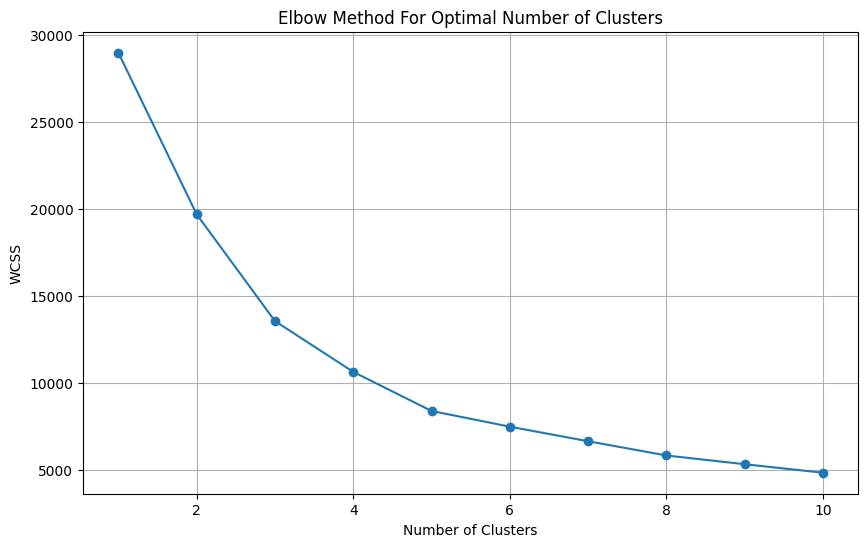

In [25]:
# Plot the Elbow method
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Based on the plot we’ve obtained, our elbow isn’t very clear. It looks like it could be at 4, 5 or 6 and is open to human interpretation

__Apply the silhouette scores method on the dataset upto 9 (include the silhouette score for 9 also) clusters in this step__ and ensure these values are stored in the  list ___silhouette scores___

In [26]:
from sklearn.metrics import silhouette_score

# Define a range of cluster counts to test

cluster_range = range(2, 10)  # Start from 2 clusters

# Initialize variables for silhouette scores

# your code here

X = data_scaled
silhouette_scores = []


# Calculate the silhouette scores for each cluster count using a for loop. Let, n_clusters=i, n_init=10, random_state=42

# your code here

for i in cluster_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
# Print Silhouette scores
for i, score in zip(cluster_range, silhouette_scores):
    print(f'Number of Clusters: {i}, Silhouette Score: {score}')

Number of Clusters: 2, Silhouette Score: 0.37346021520028555
Number of Clusters: 3, Silhouette Score: 0.46193495545753854
Number of Clusters: 4, Silhouette Score: 0.38670566529665445
Number of Clusters: 5, Silhouette Score: 0.4238991592403421
Number of Clusters: 6, Silhouette Score: 0.39495161560875314
Number of Clusters: 7, Silhouette Score: 0.38443232442677294
Number of Clusters: 8, Silhouette Score: 0.3745739529105111
Number of Clusters: 9, Silhouette Score: 0.3799523596489976


In [27]:
assert silhouette_scores[1] > 0.4, "The values calculated in silhouette_scores list is not correct. Please check and calculate again."

### Cluster the data using K-means algorithm

Once again run the k-means algorithm with the cluster that had the highest silhouette score and combine these cluster labels with the <b>data_visual</b> dataframe.

In [28]:
# Fit KMeans with _ clusters

kmeans = KMeans(n_clusters=3, random_state=42)  
kmeans.fit(data_scaled)
cluster_labels = kmeans.predict(data_scaled)

data_visual['Cluster_Labels'] = cluster_labels


C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
data_visual

,Age,Work_Experience,Family_Size,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Cluster_Labels
0,-1.269300,-0.525318,0.771516,-0.566835,-0.416395,0.801163,0
1,-0.320137,0.089366,0.096160,1.764183,-0.416395,-1.248186,1
2,1.400223,-0.525318,-1.254552,-0.566835,-0.416395,0.801163,0
3,1.400223,-0.832660,-0.579196,-0.566835,2.401563,-1.248186,2
4,-0.201491,0.089366,2.122227,-0.566835,2.401563,-1.248186,2
...,...,...,...,...,...,...,...
4827,-1.269300,-0.832660,-0.579196,-0.566835,-0.416395,0.801163,0
4828,-0.498105,1.933417,-1.254552,-0.566835,-0.416395,0.801163,0
4829,0.213768,-0.832660,0.771516,-0.566835,-0.416395,0.801163,0
4830,-0.676073,2.855442,0.771516,-0.566835,-0.416395,0.801163,0


The successful application of K-Means has thus enabled TapToBuy to segment its customer base into 3 distinct clusters, a critical step in enhancing its marketing strategies. 

This segmentation not only allows for more personalized and effective marketing campaigns, but also directly addresses the needs and preferences of each customer group. The insights gained provide a foundation for TapToBuy to refine customer engagement and product recommendations. This strategic move positions TapToBuy to better compete in the dynamic online grocery market.